### stroke prediction 

Stroke is one of the major causes of death and injury in the world. Stroke is the second leading cause of death in Korea. The Korean population is steadily ageing; the number of people aged 60 years and older is expected to rise from 13.7 percent in 2015 to 28.6 percent by 2050. Stroke occurrence grows with age. Stroke victims have longer hospital visits, higher re-admission rates, and higher treatment costs than non-stroke patients.


[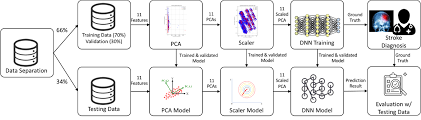](http://)




#### Attribute Information
1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

#### Acknowledgements
(Confidential Source) - Use only for educational purposes
If you use this dataset in your research, please credit the author.

#### Dataset

[link](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [2]:
df = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='stroke', ylabel='count'>

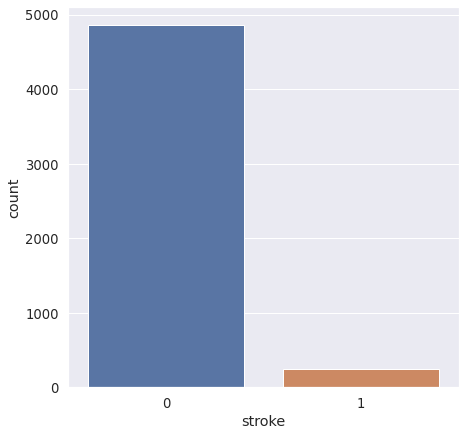

In [5]:
sns.countplot(df['stroke'],label="Count")

In [6]:
# Drop all data points with missing values
df = df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [8]:
# Label encode 'gender':
df['gender'] = df['gender'].astype('category')
df['gender'] = df['gender'].cat.codes



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# Label encode 'ever_married':
df['ever_married'] = df['ever_married'].astype('category')
df['ever_married'] = df['ever_married'].cat.codes



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# Label encode 'work_type':
df['work_type'] = df['work_type'].astype('category')
df['work_type'] = df['work_type'].cat.codes



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# Label encode 'Residence_type'
df['Residence_type'] = df['Residence_type'].astype('category')
df['Residence_type'] = df['Residence_type'].cat.codes



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# Label encode 'smoking_status':
df['smoking_status'] = df['smoking_status'].astype('category')
df['smoking_status'] = df['smoking_status'].cat.codes

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [14]:
print(df.dtypes)

id                     int64
gender                  int8
age                  float64
hypertension           int64
heart_disease          int64
ever_married            int8
work_type               int8
Residence_type          int8
avg_glucose_level    float64
bmi                  float64
smoking_status          int8
stroke                 int64
dtype: object


<AxesSubplot:>

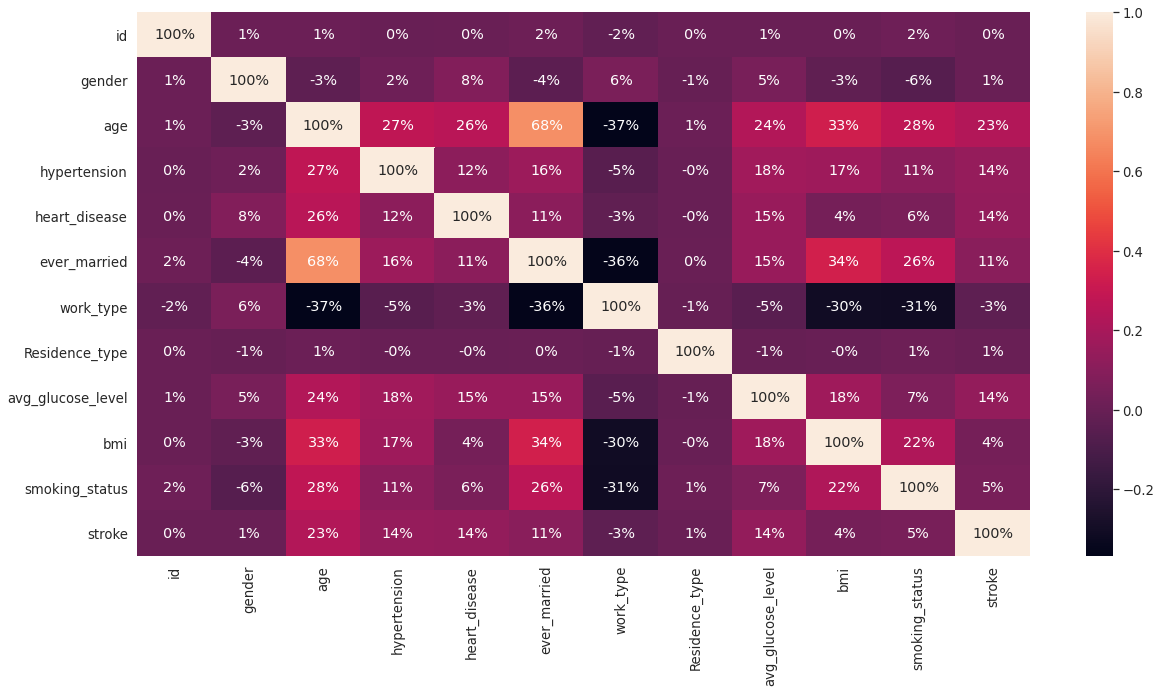

In [15]:
plt.figure(figsize=(20,10))  #This is used to change the size of the figure/ heatmap
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [16]:
# Convert the DataFrame to a numpy array
df1 = df.to_numpy()
cols = df1.shape[1]



In [17]:
X = df.drop(["stroke","id"],axis=1)
y = df["stroke"]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [19]:
x_train.shape

(3927, 10)

In [20]:
x_test.shape

(982, 10)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping

In [22]:
X.shape

(4909, 10)

In [23]:
X.shape[1]

10

In [24]:

from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

In [25]:
model = Sequential()
model.add(Input(shape=x_train.shape))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3927, 256)         2816      
_________________________________________________________________
dropout (Dropout)            (None, 3927, 256)         0         
_________________________________________________________________
dense_1 (Dense)              (None, 3927, 128)         32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 3927, 128)         0         
_________________________________________________________________
dense_2 (Dense)              (None, 3927, 64)          8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 3927, 64)          0         
_________________________________________________________________
dense_3 (Dense)              (None, 3927, 32)          2

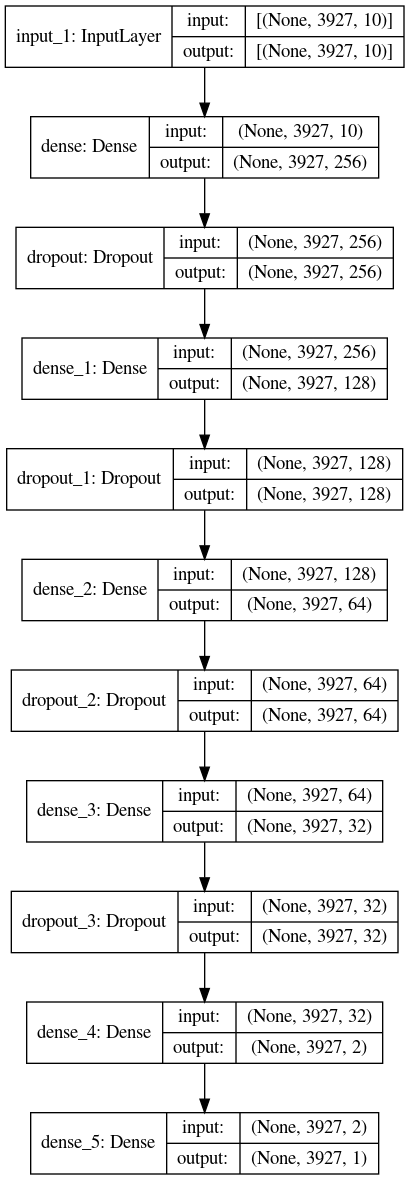

In [27]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')

In [28]:
model.compile(optimizer=Adam(0.000006), loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
lrd = ReduceLROnPlateau(monitor = 'val_loss',
                         patience = 10,
                         verbose = 1,
                         factor = 0.70,
                         min_lr = 1e-10)

mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=10)

In [30]:
history = model.fit(x_train, y_train, epochs=100, callbacks=[lrd, mcp, es], batch_size=16, validation_split=0.15,verbose = 1,shuffle=True)

Epoch 1/100
209/209 [==============================] - 2s 5ms/step - loss: 0.7358 - accuracy: 0.8473 - val_loss: 0.3016 - val_accuracy: 0.9610
Epoch 2/100
209/209 [==============================] - 1s 3ms/step - loss: 0.5379 - accuracy: 0.8906 - val_loss: 0.2856 - val_accuracy: 0.9610
Epoch 3/100
209/209 [==============================] - 1s 2ms/step - loss: 0.4986 - accuracy: 0.9138 - val_loss: 0.2623 - val_accuracy: 0.9610
Epoch 4/100
209/209 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.9255 - val_loss: 0.2489 - val_accuracy: 0.9610
Epoch 5/100
209/209 [==============================] - 0s 2ms/step - loss: 0.3779 - accuracy: 0.9472 - val_loss: 0.2360 - val_accuracy: 0.9610
Epoch 6/100
209/209 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.9301 - val_loss: 0.2250 - val_accuracy: 0.9610
Epoch 7/100
209/209 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.9419 - val_loss: 0.2190 - val_accuracy: 0.9610

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

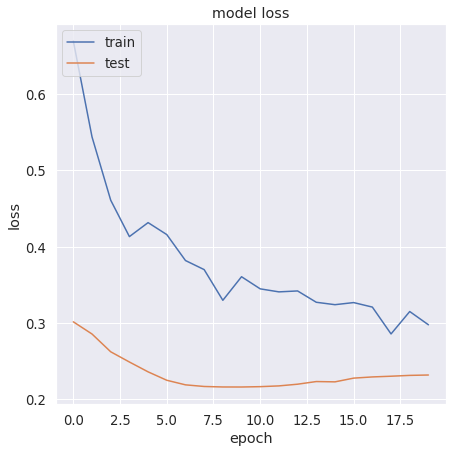

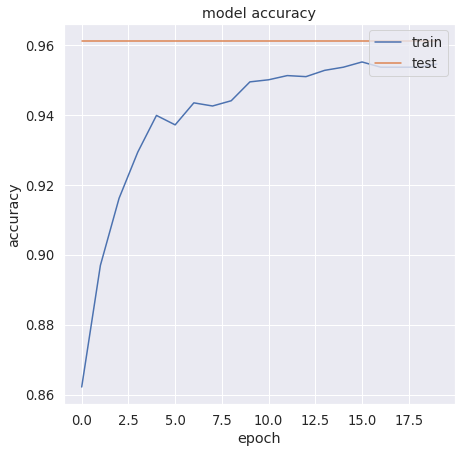

In [32]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# # summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [33]:
model.evaluate(x_test, y_test)

31/31 [==============================] - 0s 1ms/step - loss: 0.2547 - accuracy: 0.9460


[0.2547280192375183, 0.9460285305976868]

In [34]:
# Calculate the score (test loss and accuracy)
score = model.evaluate(x_test, y_test, verbose=0)

# Display the test accuracy
print(f'Test accuracy: {score[1]}')

Test accuracy: 0.9460285305976868


In [35]:
from sklearn.metrics import classification_report
import warnings

# Ignore warnings from classification_report
warnings.filterwarnings('ignore')

# Get predictions from model
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Display metrics
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       982
           1       0.00      0.00      0.00         0

    accuracy                           0.95       982
   macro avg       0.50      0.47      0.49       982
weighted avg       1.00      0.95      0.97       982



In [36]:
model.save('model.h5')

In [37]:
import joblib

In [38]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')
model.predict_classes([[9,1,80,0,1,1,2,1,1,1]])

array([[0]], dtype=int32)